In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

from pysodes.odeint import solve_ivp_wrapper

plt.rcParams.update({'font.size': 16})

In [2]:
def lorenz(x, dxdt, t):
    sigma = 10.0
    R = 28.0
    b = 8.0 / 3.0

    dxdt[0] = sigma * (x[1] - x[0])
    dxdt[1] = R * x[0] - x[1] - x[0] * x[2]
    dxdt[2] = -b * x[2] + x[0] * x[1]

    return dxdt


def lorenz_scipy(t, y):
    sigma = 10.0
    R = 28.0
    b = 8.0 / 3.0

    dydt_0 = sigma * (y[1] - y[0])
    dydt_1 = R * y[0] - y[1] - y[0] * y[2]
    dydt_2 = -b * y[2] + y[0] * y[1]

    return dydt_0, dydt_1, dydt_2

In [3]:
t_span = (0., 30.)
dt = 0.001
N = int((t_span[1] - t_span[0]) / dt)
t_eval_scipy = np.linspace(t_span[0], t_span[1], N)
y0 = np.array([0., 1., 0.1])
odeint_method = 'runge_kutta_cash_karp54'
N

30000

In [4]:
%%timeit
time, solution = solve_ivp_wrapper(lorenz, t_span, dt, y0, method=odeint_method)

760 ms ± 14.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
time, solution = solve_ivp_wrapper(lorenz, t_span, dt, y0, method=odeint_method)
print(solution[-1])

[-3.00161911 -5.40240325 11.08941128]


In [6]:
%%timeit
result = solve_ivp(lorenz_scipy, t_span, y0, t_eval=t_eval_scipy, method='RK45')

63.1 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
result = solve_ivp(lorenz_scipy, t_span, y0, t_eval=t_eval_scipy, method='RK45')
result.y[:,-1]

array([-16.04449451, -12.57188967,  40.46913609])

In [8]:
result_ref = solve_ivp(lorenz_scipy, t_span, y0, t_eval=t_eval_scipy, method='Radau')
result_ref.y[:,-1]

array([ 6.22218701, 10.79865298, 13.70452813])

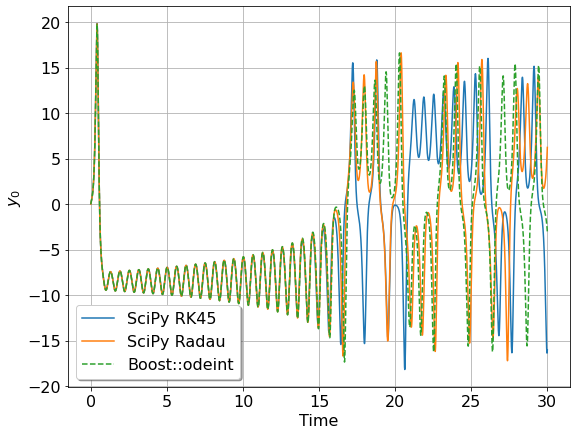

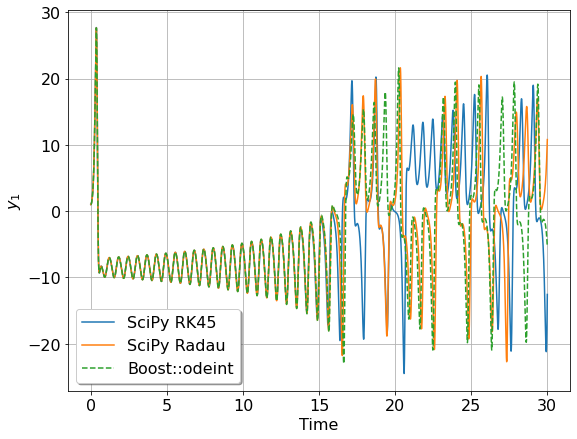

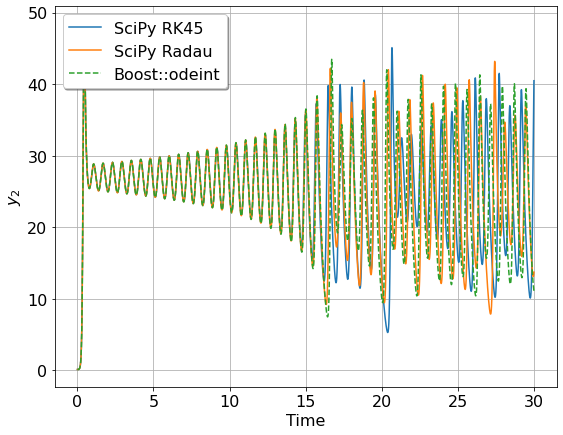

In [9]:
state_len = solution.shape[1]

for state_var in range(state_len):

    plt.figure(figsize=(9, 7))

    plt.plot(result.t, result.y[state_var, :], label='SciPy RK45')
    plt.plot(result_ref.t, result_ref.y[state_var, :], label='SciPy Radau')
    plt.plot(time, solution[:, state_var], '--', label='Boost::odeint')

    plt.xlabel("Time")
    plt.ylabel(rf"$y_{state_var}$")

    plt.legend(shadow=True)
    plt.grid(True)
    
    plt.savefig(f"system_y{state_var}.png", dpi=300)
    plt.show()